### Deep Learning with Tensorflow

<div dir="rtl">

## الگوریتم گرادیان کاهشی، مورد استفاده در آموزش شبکه‌های عصبی

</div>							 

## Regression

M. Amintoosi

اگر در گوکل کولب اجرا می‌کنید، دو دستور زیر را از حالت توضیح خارج کنید

In [1]:
# !git clone https://github.com/fum-cs/dl.git
# %cd dl/code

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

# This is needed to render the plots
from plots.utils import *
import warnings

warnings.filterwarnings("ignore")

# Visualizing Gradient Descent

### True Model

$$
\large 
\begin{align}
y &= m x + c + \epsilon \\
  &=c + m x + \epsilon
\end{align}
$$

## Data Generation

### Synthetic Data Generation

In [3]:
c = 1
m = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = 0.1 * np.random.randn(N, 1)
y = c + m * x + epsilon

### Train-Validation-Test Split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
x_train.shape, y_train.shape

((80, 1), (80, 1))

(<Figure size 864x432 with 2 Axes>,
 array([<Axes: title={'center': 'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'Generated Data - Test'}, xlabel='x', ylabel='y'>],
       dtype=object))

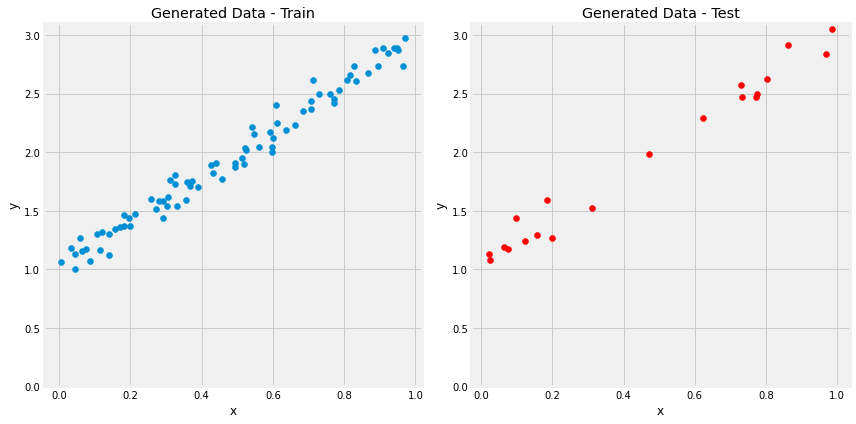

In [6]:
figure1(x_train, y_train, x_test, y_test)

## Step 0: Random Initialization

In [7]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)  # approximation of c
w = np.random.randn(1)  # approximation of m

print(b, w)

[0.49671415] [-0.1382643]


## Step 1: Compute Model's Predictions

### Estimated Model

$$
\large \hat{y} = b + w x
$$

In [8]:
# Step 1 - Computes our model's predicted output - forward pass
y_hat = b + w * x_train

(<Figure size 432x432 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

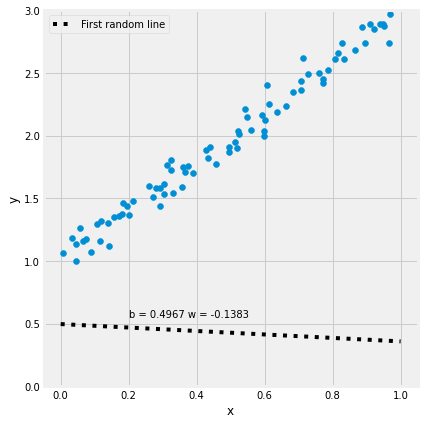

In [9]:
figure2(x_train, y_train, b, w)

## Step 2: Compute the Loss

$$
\large error_i = \hat{y_i} - y_i
$$

In [10]:
x_train[0], y_train[0], y_hat[0], b, w

(array([0.70807258]),
 array([2.36596945]),
 array([0.39881299]),
 array([0.49671415]),
 array([-0.1382643]))

[2.36596945] [0.39881299]


(<Figure size 432x432 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

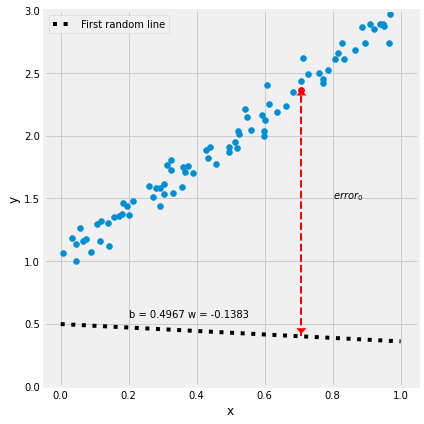

In [11]:
print(y_train[0], y_hat[0])
figure3(x_train, y_train, b, w)

$$
\large
\begin{aligned}
Loss = MSE &= \frac{1}{n} \sum_{i=1}^n{error_i}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i)}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(b + w x_i - y_i)}^2
\end{aligned}
$$

In [12]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = y_hat - y_train

# It is a regression, so it computes mean squared error (MSE)
loss = (error**2).mean()
print(loss)

2.6401126993616817


### Loss Surface

In [13]:
bs, ws, all_losses = mesh_losses(c, m, x_train, y_train)

(<Figure size 864x432 with 2 Axes>,
 (<Axes3D: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
  <Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>))

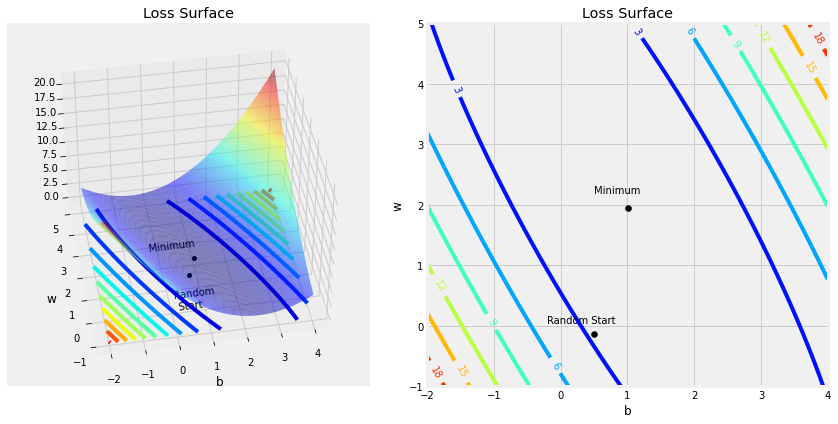

In [14]:
figure4(x_train, y_train, b, w, bs, ws, all_losses)

## Step 3: Compute the Gradients

$$
\large \hat{y} = b + w x
$$

$$
\large
\begin{aligned}
\frac{\partial{MSE}}{\partial{b}} &= \frac{\partial{}}{\partial{b}}\frac{1}{n} \big(\sum_{i=1}^n{error_i}^2\big) =\frac{1}{n} \sum_{i=1}^n{\frac{\partial{error_i^2}}{\partial{b}}}
\\
&= \frac{1}{n} \sum_{i=1}^n{\frac{\partial{{(\hat{y_i} - y_i)}^2}}{\partial{b}}}
\\
&= \frac{1}{n} \sum_{i=1}^n{2\frac{\partial{(\hat{y_i} - y_i)}}{\partial{b}}
(\hat{y_i} - y_i)}\\
&= \frac{1}{n} \sum_{i=1}^n{2\frac{\partial{(\hat{y_i} - y_i)}}{\partial{\hat{y_i}}} \cdot \frac{\partial{\hat{y_i}}}{\partial{b}}
(\hat{y_i} - y_i)}
\\
&= 2 \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i)}= 2 \frac{1}{n} \sum_{i=1}^n{error_i}
\\
\frac{\partial{MSE}}{\partial{w}} &= \frac{\partial{}}{\partial{w}}\frac{1}{n} \big(\sum_{i=1}^n{error_i}^2\big) =\frac{1}{n} \sum_{i=1}^n{\frac{\partial{error_i^2}}{\partial{w}}}
\\
&= \frac{1}{n} \sum_{i=1}^n{\frac{\partial{{(\hat{y_i} - y_i)}^2}}{\partial{w}}}
\\
&= \frac{1}{n} \sum_{i=1}^n{2\frac{\partial{(\hat{y_i} - y_i)}}{\partial{w}}
(\hat{y_i} - y_i)}\\
&= \frac{1}{n} \sum_{i=1}^n{2\frac{\partial{(\hat{y_i} - y_i)}}{\partial{\hat{y_i}}} \cdot \frac{\partial{\hat{y_i}}}{\partial{w}}
(\hat{y_i} - y_i)}
\\
&= 2 \frac{1}{n} \sum_{i=1}^n{x_i (\hat{y_i} - y_i)}= 2 \frac{1}{n} \sum_{i=1}^n{x_i error_i}
\end{aligned}
$$

In [15]:
# Step 3 - Computes gradients for both "b" and "w" parameters
dL_db = 2 * error.mean()
dL_dw = 2 * (x_train * error).mean()
print(dL_db, dL_dw)

-3.0224384959608583 -1.7706733515907813


### Backpropagation

## Step 4: Update the Parameters

$$
\large
\begin{aligned}
& b = b - \eta \frac{\partial{MSE}}{\partial{b}}
\\
& w = w - \eta \frac{\partial{MSE}}{\partial{w}}
\end{aligned}
$$

In [16]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1
print(b, w)

# Step 4 - Updates parameters using gradients and the
# learning rate
b = b - lr * dL_db
w = w - lr * dL_dw

print(b, w)

[0.49671415] [-0.1382643]
[0.798958] [0.03880303]


(<Figure size 432x432 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

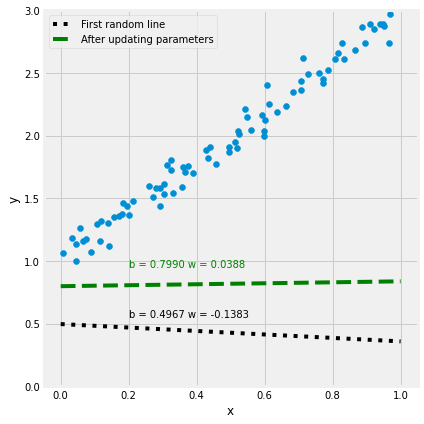

In [17]:
figure9(x_train, y_train, b, w)

## Step 5: Repeat the above updating!

In [18]:
# Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
lr = 0.3
num_epochs = 50
Losses = np.empty(num_epochs)
for epoch in range(num_epochs):
    y_hat = b + w * x_train
    error = y_hat - y_train
    loss = (error**2).mean()  # L = loss = MSE
    Losses[epoch] = loss
    dL_db = 2 * error.mean()
    dL_dw = 2 * (x_train * error).mean()
    b = b - lr * dL_db
    w = w - lr * dL_dw

b, w

(array([1.11648206]), array([1.75056848]))

(<Figure size 432x432 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

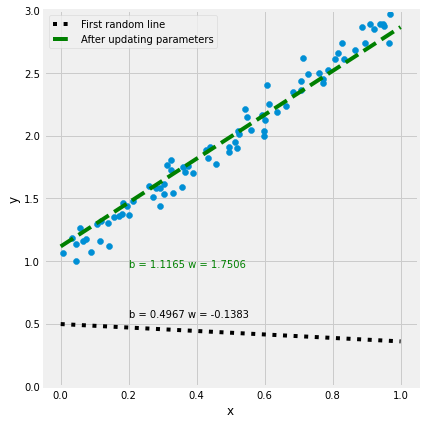

In [19]:
figure9(x_train, y_train, b, w)

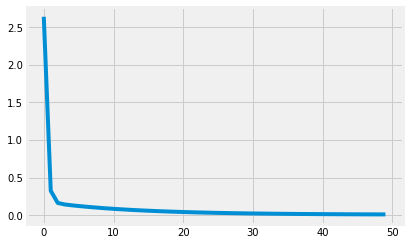

In [20]:
plt.plot(Losses)

## Using TensorFlow auto grad

In [21]:
import tensorflow as tf

# Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

# b = torch.tensor(b, requires_grad=True)
# w = torch.tensor(w, requires_grad=True)
b = tf.Variable(b)
w = tf.Variable(w)

xTrain = tf.convert_to_tensor(x_train)  # xTrain is a TensorFlow Tensor
yTrain = tf.convert_to_tensor(y_train)  # yTrain is a TensorFlow Tensor

In [22]:
lr = 0.3
num_epochs = 100
for epoch in range(num_epochs):
    # محاسبه دستی مشتق را حذف کرده و به جاش مشتق خودکار را قرار می دهیم
    with tf.GradientTape() as tape:
        y_hat = b + w * xTrain
        error = y_hat - yTrain
        loss = tf.reduce_mean(error**2)
    dL_dw, dL_db = tape.gradient(loss, [w, b])
    b.assign_sub(lr * dL_db)
    w.assign_sub(lr * dL_dw)

b.numpy(), w.numpy()

(array([1.02723471]), array([1.92622074]))

Note: Updating by the following commands is wrong:

    b -= lr * dL_db
    w -= lr * dL_dw

(<Figure size 432x432 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

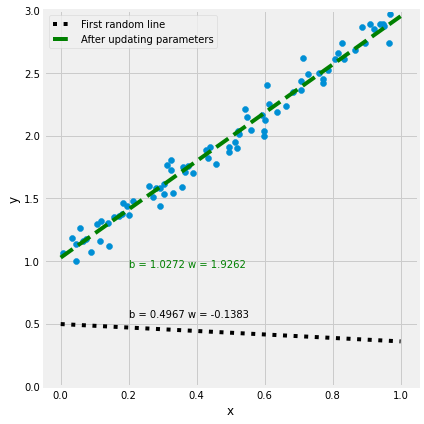

In [23]:
figure9(x_train, y_train, b, w)

## Keras MSE

mse = tf.keras.losses.MeanSquaredError()

https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredError

In [24]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

b = tf.Variable(b)
w = tf.Variable(w)

xTrain = tf.convert_to_tensor(x_train)  # xTrain is a TensorFlow Tensor
yTrain = tf.convert_to_tensor(y_train)  # yTrain is a TensorFlow Tensor

lr = 0.3
num_epochs = 100
mse = tf.keras.losses.MeanSquaredError()
for epoch in range(num_epochs):
    # به جای محاسبه خطا به صورت دستی از تابع کراس استفاده می‌کنیم
    with tf.GradientTape() as tape:
        y_hat = b + w * xTrain
        loss = mse(yTrain, y_hat)
    dL_dw, dL_db = tape.gradient(loss, [w, b])
    b.assign_sub(lr * dL_db)
    w.assign_sub(lr * dL_dw)

b.numpy(), w.numpy()

(array([1.02723471]), array([1.92622074]))

(<Figure size 432x432 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

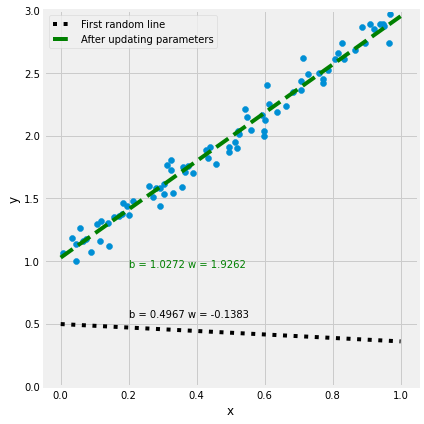

In [25]:
figure9(x_train, y_train, b, w)

## Using Keras Optimizer

### apply_gradients

In [38]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

b = tf.Variable(b)
w = tf.Variable(w)

lr = 0.3
num_epochs = 200
mse = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
for epoch in range(num_epochs):
    # به جای محاسبه خطا به صورت دستی از تابع کراس استفاده می‌کنیم
    with tf.GradientTape() as tape:
        y_hat = b + w * xTrain
        loss = mse(yTrain, y_hat)
    dL_dw, dL_db = tape.gradient(loss, [w, b])
    optimizer.apply_gradients([(dL_db, b), (dL_dw, w)])
    # b.assign_sub(lr * dL_db)
    # w.assign_sub(lr * dL_dw)

b.numpy(), w.numpy()

(array([1.01294384]), array([1.95434733]))

## Using Keras model

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture
model = Sequential()
model.add(Dense(units=1, input_dim=1))

# Compile the model
model.compile(optimizer="sgd", loss="mse")

# Train the model
model.fit(xTrain, yTrain, epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 8ms/step - loss: 2.4942
Epoch 2/100
3/3 [==============================] - 0s 0s/step - loss: 2.1491
Epoch 3/100
3/3 [==============================] - 0s 0s/step - loss: 1.8534
Epoch 4/100
3/3 [==============================] - 0s 0s/step - loss: 1.5960
Epoch 5/100
3/3 [==============================] - 0s 0s/step - loss: 1.3780
Epoch 6/100
3/3 [==============================] - 0s 0s/step - loss: 1.1900
Epoch 7/100
3/3 [==============================] - 0s 0s/step - loss: 1.0268
Epoch 8/100
3/3 [==============================] - 0s 0s/step - loss: 0.8868
Epoch 9/100
3/3 [==============================] - 0s 0s/step - loss: 0.7675
Epoch 10/100
3/3 [==============================] - 0s 0s/step - loss: 0.6656
Epoch 11/100
3/3 [==============================] - 0s 8ms/step - loss: 0.5792
Epoch 12/100
3/3 [==============================] - 0s 8ms/step - loss: 0.5019
Epoch 13/100
3/3 [==============================] - 0s 3ms/step - loss

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


استخراج پارامترهای مدل

In [29]:
w_hat = model.variables[0].numpy()[0]
b_hat = model.variables[1].numpy()

w_hat, b_hat

(array([1.5944511], dtype=float32), array([1.1947646], dtype=float32))

(<Figure size 432x432 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

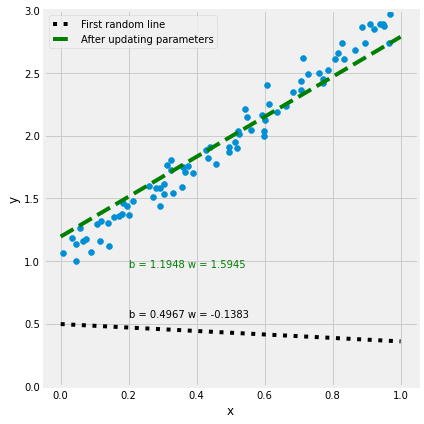

In [30]:
figure9(x_train, y_train, b_hat, w_hat)

روش ساده‌تر زیر هم برای گرفتن مقدار پارامترها هست:
<br>
w_hat = model.get_layer('dense').kernel.numpy()[0] <br>
b_hat = model.get_layer('dense').bias.numpy() <br>

اما
در دفعات مختلف اجرا، نام لایه‌ها ثابت باقی نمی ماند.
 مگر اینکه در هنگام طراحی مدل به لایه‌ها نام بدهیم

## بر روی داده‌های معمولی هم جواب می‌دهد

In [31]:
model = Sequential()
model.add(Dense(units=1, input_dim=1, name="dense1"))
model.compile(optimizer="sgd", loss="mse")
model.fit(x_train, y_train, epochs=100, verbose=False)

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


در این حالت می‌توان از نام لایه برای دسترسی به پارامترها استفاده کرد

(<Figure size 432x432 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

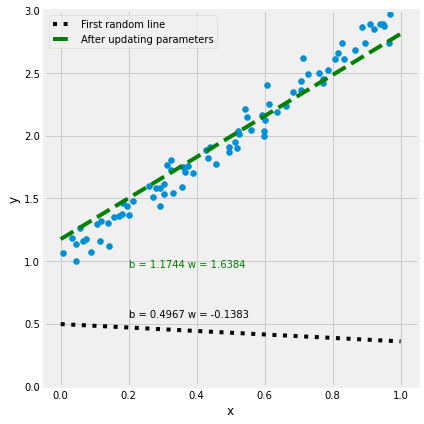

In [33]:
w_hat = model.get_layer("dense1").kernel.numpy()[0]
b_hat = model.get_layer("dense1").bias.numpy()
b_hat, w_hat
figure9(x_train, y_train, b_hat, w_hat)

## Prediction is easy

In [34]:
# Predict values
y_pred = model.predict(x_test)
print(y_pred.flatten())  # Flatten to remove dimensions

1/1 [==============================] - 0s 139ms/step
[2.4380655 1.2785287 2.5885277 1.2160403 2.373714  1.2957098 1.4999747
 1.6839157 1.9480841 2.76299   1.374344  2.444394  2.4887366 2.3698018
 1.3344218 1.477264  1.4300185 1.208119  2.7913384 2.1956234]


بهتر است لایه ورودی به صورت جدا مشخص شود

In [35]:
model = Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(Dense(1, name="dense1"))
model.compile(optimizer="sgd", loss="mse")
model.fit(x_train, y_train, epochs=100, verbose=False)

w_hat = model.get_layer("dense1").kernel.numpy()[0]
b_hat = model.get_layer("dense1").bias.numpy()
b_hat[0], w_hat[0]

(1.7337562, 0.5361281)